a.Divide the dataset as development and test.

In [12]:
#check_out is used to check file in kaggle
#from subprocess import check_output
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import copy
import matplotlib.pyplot as plt
import matplotlib

In [13]:
x = []
y = []
datas = []
x_develop, x_test, y_develop, y_test =[],[],[],[]
#check the file in kaggle
#print(check_output(["ls","../input"]).decode("utf8"))
with open('../input/dataset/iris.data', 'r') as f:
    data = f.read().splitlines()
    
data = data[:-1]    
    
for doc in data:
    doc = doc.split(",")
    datas.append(doc)
    df = pd.DataFrame(datas, columns=[
                        'sl', 'sw', 'pl', 'pw', 'label'])

x = df.values[:,:-1]
y = df.values[:,-1]

#convert the str element in x to float type 
#to do calculations later
for i in range(len(x)):
    for j in range(len(x[0])):
        x[i][j]=float(x[i][j])
    

#print(x)
#print(y)

#divide the dataset into develop set and test set randomly, and we set test_size=0.2 to let the size of test in a suitable range
x_develop, x_test, y_develop, y_test = train_test_split(x,y,test_size=0.2, random_state=50)


#print(x_develop)
#print(x_test)
#print(y_test)



b.implement kNN using the following hyperparameters
k from 1 to 20

euclidean distance

normalized euclidean distance

cosine similarity

c.After my thinking, I decided to create three functions to calculate there types of distance, and find the accuracy of each function at many k values. Currently, I assume the value of k is 1 ~ 20. So the number of all cases is 60. After getting the accuracy of all cases, I will plot them and compare them to get the optimal solution.

def the eucliden distance function

In [14]:
#get the euclidean distance from two data
def e_dist(data1,data2):
    dist = 0
    data3 = data2-data1
    #print(data3)
    dist = np.sqrt(np.sum(np.square(data1-data2)))           
    return dist

print(x_develop[0])
print(x_develop[1])
print(e_dist(x_develop[0],x_develop[1]))


[7.2 3.2 6.0 1.8]
[5.1 2.5 3.0 1.1]
3.793415347678132


def the normalized eucliden distance function

In [15]:
#get the normalized euclidean distance from two data--copyright belong to Yipu Qin 
x_var=[]
for i in range(len(x_develop[0])):
               x_var.append(np.var(x_develop[:,i]))
    
print(x_var)

def n_e_dist(data1,data2):
    dist = 0
    data3 = np.square(data1-data2)
    dist = np.sqrt(np.sum(data3/x_var))           
    return dist

print(x_develop[0])
print(x_develop[1])
print(n_e_dist(x_develop[0],x_develop[1]))

    

[0.6761659722222223, 0.18511041666666678, 3.067832638888887, 0.5713826388888888]
[7.2 3.2 6.0 1.8]
[5.1 2.5 3.0 1.1]
3.6000516975942887


def the function to get the cosine similarity

In [16]:
#get the cosine similarity from two data, copyright belongs to Yipu Qin
def cos_dist(data1,data2):
    dist=0
    x=data1
    y=data2
    res = np.array([[x[i] * y[i], x[i] * x[i], y[i] * y[i]] for i in range(len(x))])
    cos = sum(res[:, 0]) / (np.sqrt(sum(res[:, 1])) * np.sqrt(sum(res[:, 2])))
    return 0.5*cos + 0.5 # let the range of value of result become [0,1] from [-1,1]

print(x_develop[0])
print(x_develop[5])
print(cos_dist(x_develop[0],x_develop[1]))



[7.2 3.2 6.0 1.8]
[4.6 3.1 1.5 0.2]
0.9931574110151159


def the function to get the result of input data depend on the value of k and the input data and input dataset and the type of value

In [17]:
#bubblesort x[] and y[] but just depend on the elements in x[]
def bubbleSort_xy(x,y):
    for i in range(len(x) - 1):
        for j in range(len(x) - i - 1): 
            if x[j] > x[j+1]:
                x[j], x[j+1] = x[j+1], x[j]
                y[j], y[j+1] = y[j+1], y[j]
    return x,y

#the function to get result of input from x_set, copyright belongs to Yipu Qin
def get_result(input, x_set, y_set, k, method):
    x_test = input
    #store the distance between x_test and x_set[i]
    dist = []
    #print(x_set)
    #method = 1, use the euclidean distance
    if method == 1 :
        for i in range(len(x_set)):
            dist.append(e_dist(x_test,x_set[i]))
            #print(e_dist(x_test,x_set[i]))
        #print(dist)
        #print(y_set)
        dist_order = copy.deepcopy(dist)
        y_order = copy.deepcopy(y_set)
        bubbleSort_xy(dist_order,y_order)
        #print(dist_order)
        #print(y_order)
        y_k = y_order[:k]# store the k smallest(nearest depend on x_develop[]) labels from y_order
        #print(y_k)
        y_k_count = []# y_k_count store the time that the y_k[i] happen in y_k, copyright belong to Yipu Qin 
        for label in y_k:
            count = 0
            for i in range(len(y_k)):
                if(label==y_k[i]):
                    count = count + 1
            y_k_count.append(count)
        #print(y_k_count)
        max_index = y_k_count.index(max(y_k_count))
        result = y_k[max_index]
        return result
    #if method = 2, use the normalized euclidean distance    
    elif method == 2:
        for i in range(len(x_set)):
            dist.append(n_e_dist(x_test,x_set[i]))
            #print(e_dist(x_test,x_set[i]))
        #print(dist)
        #print(y_set)
        dist_order = copy.deepcopy(dist)
        y_order = copy.deepcopy(y_set)
        bubbleSort_xy(dist_order,y_order)
        #print(dist_order)
        #print(y_order)
        y_k = y_order[:k]# store the k smallest(nearest depend on x_develop[]) labels from y_order
        #print(y_k)
        y_k_count = []# y_k_count store the time that the y_k[i] happen in y_k, copyright belong to Yipu Qin 
        for label in y_k:
            count = 0
            for i in range(len(y_k)):
                if(label==y_k[i]):
                    count = count + 1
            y_k_count.append(count)
        #print(y_k_count)
        max_index = y_k_count.index(max(y_k_count))
        result = y_k[max_index]
        return result
    #use the cosine similirity
    else :
        for i in range(len(x_set)):
            dist.append(cos_dist(x_test,x_set[i]))
            #print(e_dist(x_test,x_set[i]))
        #print(dist)
        #print(y_set)
        dist_order = copy.deepcopy(dist)
        y_order = copy.deepcopy(y_set)
        bubbleSort_xy(dist_order,y_order)
        #print(dist_order)
        #print(y_order)
        y_k = y_order[-k:]# store the k smallest(nearest depend on x_develop[]) labels from y_order
        #print(y_k)
        y_k_count = []# y_k_count store the time that the y_k[i] happen in y_k, copyright belong to Yipu Qin 
        for label in y_k:
            count = 0
            for i in range(len(y_k)):
                if(label==y_k[i]):
                    count = count + 1
            y_k_count.append(count)
        #print(y_k_count)
        max_index = y_k_count.index(max(y_k_count))
        result = y_k[max_index]
        return result
        
        
    
num=0
print(x_develop[num])
print(y_develop[num])
x_develop_cal = copy.deepcopy(x_develop) # use to calculate
y_develop_cal = copy.deepcopy(y_develop) # use to calculate
for i in range(num + 1, len(x_develop_cal)):
    x_develop_cal[i-1] = x_develop_cal[i]
    y_develop_cal[i-1] = y_develop_cal[i]
x_develop_cal = x_develop_cal[:-1]
y_develop_cal = y_develop_cal[:-1]
#print(x_develop_cal)
#print(x_develop)
print(get_result(x_develop[num],x_develop_cal,y_develop_cal,20,1))


[7.2 3.2 6.0 1.8]
Iris-virginica
Iris-virginica


Calculate accuracy by iterating all of the development data point

In [29]:
#get the accuracy for a case of value of k and one type of deistance_caculation method, copyright belongs to Yipu Qin
right_num = 0.0000
result_label = []
result_develop = 0.0000
for i in range(len(x_develop)):
    x_develop_cal = copy.deepcopy(x_develop) # use to calculate
    y_develop_cal = copy.deepcopy(y_develop) # use to calculate
    for j in range(i + 1, len(x_develop_cal)):
        x_develop_cal[j-1] = x_develop_cal[j]
        y_develop_cal[j-1] = y_develop_cal[j]
    x_develop_cal = x_develop_cal[:-1]
    y_develop_cal = y_develop_cal[:-1]
    result_label =get_result(x_develop[i],x_develop_cal,y_develop_cal,1,1)
    if result_label == y_develop[i]:
        right_num = right_num + 1

print(right_num)
print(len(x_develop))
result_develop = right_num/len(x_develop)
#at first try, k = 1, method is e_distance, the accuracy is 0.9583333333333334
print(result_develop)


115.0
120
0.9583333333333334


Find optimal hyperparameters
and
Draw bar charts for accuracy

In [26]:
#get the most accuracy when use euclidean method with a value of k
accuracy_e_dist = []
for k in range(1,21):
    right_num = 0.0000
    result_label = []
    result_develop = 0.0000
    for i in range(len(x_develop)):
        x_develop_cal = copy.deepcopy(x_develop) # use to calculate
        y_develop_cal = copy.deepcopy(y_develop) # use to calculate
        for j in range(i + 1, len(x_develop_cal)):
            x_develop_cal[j-1] = x_develop_cal[j]
            y_develop_cal[j-1] = y_develop_cal[j]
        x_develop_cal = x_develop_cal[:-1]
        y_develop_cal = y_develop_cal[:-1]
        #print(x_develop[i])
        #print(x_develop_cal)
        #print("\n")
        result_label =get_result(x_develop[i],x_develop_cal,y_develop_cal,k,1)
        if result_label == y_develop[i]:
            right_num = right_num + 1
    #print(k)
    #print(right_num)
    #print(len(x_develop))
    result_develop = right_num/len(x_develop)
    accuracy_e_dist.append(result_develop)

#get the most accuracy when use nomalized euclidean method with a value of k
accuracy_n_e_dist = []
for k in range(1,21):
    right_num = 0.0000
    result_label = []
    result_develop = 0.0000
    for i in range(len(x_develop)):
        x_develop_cal = copy.deepcopy(x_develop) # use to calculate
        y_develop_cal = copy.deepcopy(y_develop) # use to calculate
        for j in range(i + 1, len(x_develop_cal)):
            x_develop_cal[j-1] = x_develop_cal[j]
            y_develop_cal[j-1] = y_develop_cal[j]
        x_develop_cal = x_develop_cal[:-1]
        y_develop_cal = y_develop_cal[:-1]
        result_label =get_result(x_develop[i],x_develop_cal,y_develop_cal,k,2)
        if result_label == y_develop[i]:
            right_num = right_num + 1
    #print(k)
    #print(right_num)
    #print(len(x_develop))
    result_develop = right_num/len(x_develop)
    accuracy_n_e_dist.append(result_develop)

#get the most accuracy when use cosine similirity method with a value of k
accuracy_cos_dist = []
for k in range(1,21):
    right_num = 0.0000
    result_label = []
    result_develop = 0.0000
    for i in range(len(x_develop)):
        x_develop_cal = copy.deepcopy(x_develop) # use to calculate
        y_develop_cal = copy.deepcopy(y_develop) # use to calculate
        for j in range(i + 1, len(x_develop_cal)):
            x_develop_cal[j-1] = x_develop_cal[j]
            y_develop_cal[j-1] = y_develop_cal[j]
        x_develop_cal = x_develop_cal[:-1]
        y_develop_cal = y_develop_cal[:-1]
        result_label =get_result(x_develop[i],x_develop_cal,y_develop_cal,k,3)
        if result_label == y_develop[i]:
            right_num = right_num + 1
    #print(k)
    #print(right_num)
    #print(len(x_develop))
    result_develop = right_num/len(x_develop)
    accuracy_cos_dist.append(result_develop)

print(accuracy_e_dist)
print(len(accuracy_e_dist))
print ("So for the euclidean distance, the best k is :" )
print(accuracy_e_dist.index(max(accuracy_e_dist)) + 1)
print("the best accuracy is:")
print((max(accuracy_e_dist)))
print(accuracy_n_e_dist)
print(len(accuracy_n_e_dist))
print ("For the normolized euclidean distance, the best k is :" )
print(accuracy_n_e_dist.index(max(accuracy_n_e_dist)) + 1)
print("The best accuracy is:")
print((max(accuracy_n_e_dist)))
      
print(accuracy_cos_dist)
print(len(accuracy_cos_dist))
print ("For the cosine similirity, the best k is :" )
print(accuracy_cos_dist.index(max(accuracy_cos_dist)) + 1)
print("The best accuracy is:")
print((max(accuracy_cos_dist)))


[0.9583333333333334, 0.9583333333333334, 0.975, 0.975, 0.975, 0.975, 0.9666666666666667, 0.975, 0.9666666666666667, 0.975, 0.975, 0.975, 0.9666666666666667, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
20
So for the euclidean distance, the best k is :
3
the best accuracy is:
0.975
[0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9583333333333334, 0.95, 0.95, 0.9416666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9583333333333334, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333]
20
For the normolized euclidean distance, the best k is :
12
The best accuracy is:
0.9666666666666667
[0.9666666666666667, 0.9916666666666667, 0.9916666666666667, 0.9583333333333334, 0.975, 0.975, 0.9666666666666667, 0.9833333333333333, 0.975, 0.9666666666666667, 0.975, 0.975,

So we get:

For the euclidean distance, the best k is:3
the best accuracy is:0.975

For the normolized euclidean distance, the best k is:12
The best accuracy is:0.9666666666666667

For the cosine similirity, the best k is:2
The best accuracy is:0.9916666666666667

For all cases in develop data set, the optimal hyperparameters is use the cosine similirity and k = 2, and the accuracy is 0.9916666666666667

Draw bar charts for  accuracy of 60 cases

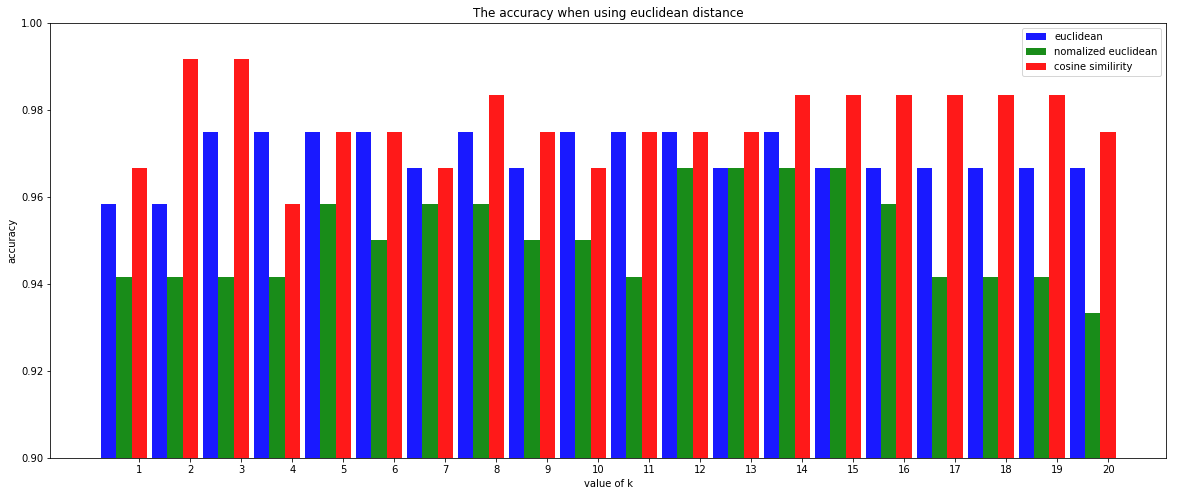

In [20]:

name_list = range(1,21)
plt.figure(figsize=(20,8))
plt.ylim(0.9,1)
plt.ylabel("accuracy")
plt.xlabel("value of k")
plt.title("The accuracy when using euclidean distance") 
p1 = plt.bar(x = range(len(accuracy_e_dist)), height = accuracy_e_dist, width = 0.3, alpha = 0.9, color = "blue", tick_label = name_list,label = "euclidean")
p2 = plt.bar(x = [i+0.3 for i in range(len(accuracy_n_e_dist))], height = accuracy_n_e_dist, width = 0.3, alpha = 0.9, color = "green", tick_label = name_list, label = "nomalized euclidean")
p3 = plt.bar(x = [i+0.6 for i in range(len(accuracy_cos_dist))], height = accuracy_cos_dist, width = 0.3, alpha = 0.9, color = "red", tick_label = name_list, label = "cosine similirity")
plt.legend()
plt.show()

d.Using the test dataset
Use the optimal hyperparameters you found in the step c, and use it to calculate the final accuracy.  

In [21]:
#get the most accuracy when use  the optimal hyperparameters you found in the step c

accuracy_final = 0.00000

right_num = 0.0000
result_label = []
result_develop = 0.0000
for i in range(len(x_test)):
    result_label =get_result(x_test[i],x_develop_cal,y_develop_cal,2,3)
    if result_label == y_test[i]:
        right_num = right_num + 1
    #print(k)
    #print(right_num)
    #print(len(x_develop))
result_test = right_num/len(x_test)
accuracy_final=result_test


print ("The final accuracy is :" )
print(accuracy_final)


The final accuracy is :
0.9666666666666667


The final accuracy is :0.9666666666666667